In [2]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
torch.cuda.empty_cache()
device = "cuda"

In [12]:
num_vectors = 1000
vector_len = 100

In [13]:
big_matrix = torch.randn(num_vectors, vector_len, device=device)
big_matrix /= big_matrix.norm(p=2, dim=1, keepdim=True)
big_matrix.requires_grad_(True)

tensor([[ 0.2314,  0.0692,  0.0349,  ..., -0.1335,  0.1263,  0.0684],
        [ 0.0460,  0.0994,  0.0019,  ...,  0.0509,  0.1451,  0.0346],
        [ 0.1117, -0.0071,  0.0281,  ...,  0.0429,  0.0127,  0.1268],
        ...,
        [-0.0204, -0.1479, -0.1225,  ..., -0.0408, -0.0274,  0.0149],
        [ 0.0976,  0.1725, -0.0051,  ...,  0.0306, -0.0595,  0.0735],
        [ 0.0284,  0.0669, -0.0353,  ..., -0.1083, -0.0967, -0.0526]],
       device='cuda:0', requires_grad=True)

In [14]:
optimizer = torch.optim.Adam([big_matrix], lr=0.01)
num_steps = 250

losses= []
dot_diff_cutoff = 0.01
big_id = torch.eye(num_vectors, num_vectors, device=device)

In [15]:

for step_num in tqdm(range(num_steps)):
    optimizer.zero_grad()
    dot_products = big_matrix @ big_matrix.T

    diff = dot_products - big_id
    loss = (diff.abs() - dot_diff_cutoff).relu().sum()
    loss += num_vectors * diff.diag().pow(2).sum()

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

100%|██████████| 250/250 [00:00<00:00, 454.65it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

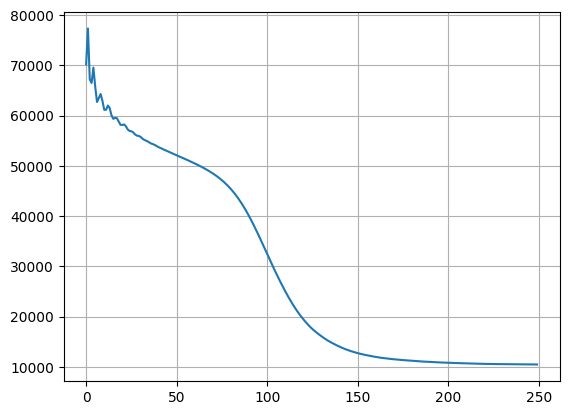

In [16]:
plt.plot(losses)
plt.grid(1)
plt.show

In [17]:
big_matrix[0]

tensor([ 1.3330e-01, -8.9730e-02, -1.5327e-02,  3.9815e-02, -3.2311e-03,
         3.7152e-02,  1.1883e-01, -4.2781e-02,  1.6759e-02,  7.6313e-02,
         9.0566e-02,  1.5586e-01,  1.1975e-01, -4.5236e-02,  2.9246e-02,
         5.8549e-02, -1.6801e-02,  5.4388e-02, -1.9717e-01,  1.4304e-01,
        -7.2095e-02, -5.5598e-02,  2.1757e-02,  2.0748e-01,  1.1265e-01,
         1.0397e-01,  3.8926e-02,  2.7025e-02, -1.7887e-01,  5.8412e-02,
        -5.4482e-02, -1.2009e-01, -1.2068e-01, -4.4687e-02, -1.0607e-02,
         1.6460e-01, -5.5685e-02, -1.3707e-01, -4.4613e-02,  5.7255e-02,
         2.3448e-02,  5.5235e-02,  6.1008e-02,  1.5558e-01,  1.4469e-01,
        -9.7977e-02,  1.7734e-03, -5.4666e-02, -8.0829e-02,  9.2829e-02,
        -3.0821e-01,  2.3282e-01,  2.1482e-02, -1.4671e-02, -9.0096e-02,
         1.7104e-01, -5.4324e-02,  7.1779e-02, -4.9386e-02,  2.8315e-02,
        -6.2465e-02,  2.6356e-02, -1.9466e-02,  6.5296e-02, -7.3274e-02,
         2.9719e-02,  1.3385e-01, -1.1394e-01,  5.2

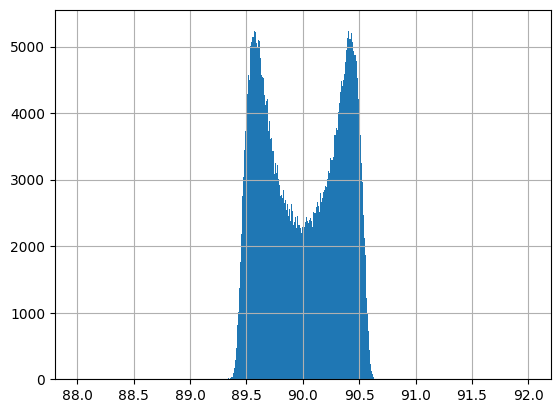

In [18]:
dot_products = big_matrix @ big_matrix.T
norms = torch.sqrt(torch.diag(dot_products))
normed_dot_products = dot_products / torch.outer(norms, norms)
angles_degrees = torch.rad2deg(torch.acos(normed_dot_products))
self_orthogonality_mask = ~(torch.eye(num_vectors, num_vectors).bool())

plt.hist(angles_degrees[self_orthogonality_mask].cpu().detach().numpy().ravel(), bins=1000, range=(88, 92))
plt.grid(1)
plt.show()

In [19]:
print(self_orthogonality_mask)

tensor([[False,  True,  True,  ...,  True,  True,  True],
        [ True, False,  True,  ...,  True,  True,  True],
        [ True,  True, False,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True,  True, False]])


In [20]:
angles_degrees[self_orthogonality_mask]

tensor([90.0958, 89.7167, 89.8195,  ..., 90.5465, 90.2760, 89.5518],
       device='cuda:0', grad_fn=<IndexBackward0>)